In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
import scipy
from utils import load_data
from sklearn.datasets import make_blobs
from IFD_tsne import *
#from utils import load_data, MidpointNormalize, equipotential_standard_normal, plot_heatmaps
from utils import MidpointNormalize, load_data
import matplotlib.pyplot as plt
#import tikzplotlib

X, y = make_blobs(n_samples=50, n_features=127, centers=4, random_state=0, shuffle=False, cluster_std=[0.1, 3, 3, 3])
#X, y = load_data(10)
key = random.PRNGKey(42)

y_guess = random.normal(key, shape=(X.shape[0], 2))

Y_star = tsne_fwd(X, y_guess)

X_flat, X_unflattener = flatten_util.ravel_pytree(np.array(X))   # row-wise
Y_flat, Y_unflattener = flatten_util.ravel_pytree(Y_star)


===> Finding 49 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.01 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 0.9062, 50 iterations in 0.7563 sec
Iteration  100, KL divergence 0.9562, 50 iterations in 0.5362 sec
Iteration  150, KL divergence 1.0021, 50 iterations in 0.5211 sec
Iteration  200, KL divergence 0.9444, 50 iterations in 0.4094 sec
Iteration  250, KL divergence 0.9086, 50 iterations in 0.3655 sec
   --> Time elapsed: 2.59 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 for 750 iterations...
Iteration   50, KL divergence 0.0138, 50 iterations in 0.3658 sec
Iteration  100, KL divergence 0.0136, 50 iterations in 0.3599 sec
Iteration  150, KL divergence 0.0136, 50 iterations in 0.3607 sec
Iteration  200, KL divergence 0.0136, 50 iterations in 0.3617 sec
Iteration 

In [3]:
import openTSNE
def tsne_fwd(x, y_guess):
  affinity = openTSNE.affinity.PerplexityBasedNN(
      x,
      perplexity=30.0,
      method="annoy",
      random_state=42,
      verbose=True,
  )

  init = openTSNE.initialization.random(
      x, n_components=2, random_state=42, verbose=True,
  )
  
  y_star = openTSNE.TSNEEmbedding(
      y_guess,
      affinity,
      learning_rate=200,
      negative_gradient_method="fft",
      random_state=42,
      verbose=False
  )
  y_star.optimize(250, exaggeration=12, momentum=0.8, inplace=True, verbose=True)
  y_star.optimize(750, momentum=0.5, inplace=True, verbose=True)
  return y_star
Y_star = tsne_fwd(X, y_guess)

===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.03 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 0.5661, 50 iterations in 0.3990 sec
Iteration  100, KL divergence 0.5292, 50 iterations in 0.3731 sec
Iteration  150, KL divergence 0.5246, 50 iterations in 0.3866 sec
Iteration  200, KL divergence 0.4661, 50 iterations in 0.3726 sec
Iteration  250, KL divergence 0.4899, 50 iterations in 0.3860 sec
   --> Time elapsed: 1.92 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 for 750 iterations...
Iteration   50, KL divergence 0.0360, 50 iterations in 0.3657 sec
Iteration  100, KL divergence 0.0341, 50 iterations in 0.3649 sec
Iteration  150, KL divergence 0.0337, 50 iterations in 0.3644 sec
Iteration  200, KL divergence 0.0332, 50 iterations in 0.3633 sec
Iteration 

In [5]:
def KL_divergence(X_flat, Y_flat, X_unflattener, Y_unflattener):
    """
    (R^nxp x R^nxp)--> R
    """
    X = X_unflattener(X_flat)
    Y = Y_unflattener(Y_flat)
    learning_rate, perplexity = (200, 1.33)
    P = x2p(X, tol=1e-5, perplexity=perplexity)
    P = (P + np.transpose(P))
    P = P / np.sum(P)      # Why don't we devide by 2N as described everywhere?
    P = np.maximum(P, 1e-12)
    Q, _ = y2q(Y)
    return np.sum(P * (np.log(P+1e-10) - np.log(Q+1e-10)))

primals = (X_flat, Y_flat)
KL_divergence_fun = partial(KL_divergence, X_unflattener=X_unflattener, Y_unflattener= Y_unflattener)

In [6]:
J_X_Y = jacfwd(KL_divergence, argnums=1)(X_flat, Y_flat, X_unflattener, Y_unflattener)
print(J_X_Y)

Computing pairwise distances...
Starting binary search
Entered binary search function
[ 5.8166077e-03  7.5953722e-04  6.6890446e-03  8.4304844e-04
  6.9727236e-03  9.0072566e-04  5.0979462e-03  9.2264672e-04
  6.5183323e-03  7.5618003e-04  5.9889546e-03  9.3816989e-04
  6.8606501e-03  7.3266187e-04  3.8230154e-03  8.4794889e-04
  6.2074177e-03  9.9553680e-04  6.2117996e-03  9.3352492e-04
  6.1328905e-03  1.1484912e-03  7.2138035e-03  7.6574332e-04
  5.6383638e-03  7.9412380e-04  1.3280415e-03 -6.5849372e-03
  5.4882170e-04 -6.1122850e-03 -2.9859331e-03 -5.6180586e-03
  8.3348155e-03 -1.0515971e-02  1.0242945e-03 -8.1877820e-03
  3.9233528e-03 -1.4280935e-03  1.9426401e-03 -4.2687901e-03
  1.5078193e-03 -1.1059994e-02  2.1638325e-03 -7.0144664e-03
 -9.6783135e-04 -3.8135576e-03 -8.4583554e-03 -1.4988737e-03
  7.6018926e-04 -9.9046743e-03 -8.6719618e-04 -9.2594689e-03
  7.6122186e-04  7.5552096e-03 -2.0633494e-03  8.5846474e-03
  1.2674471e-03  8.7593440e-03 -4.8729614e-04  6.1055054e-03

In [62]:
from pseudo_IFD_tsne import *

fun = lambda y: KL_divergence(X_flat, y, X_unflattener, Y_unflattener)

In [63]:
H = jax.hessian(fun)(Y_flat)
H_pinv = np.linalg.pinv(H, hermitian=True)

Computing pairwise distances...
Starting binary search
Entered binary search function


In [64]:
M = np.eye(len(Y_flat))
time_start = time.time()
dy_dx = M_d_y_star_d_x_P(KL_divergence_fun, primals, M, H_pinv)
time_end = time.time()
print(time_end - time_start)

Compute v3
Computing pairwise distances...
Starting binary search
Entered binary search function
0.4138681888580322


In [65]:
cov_final = np.dot(np.dot(dy_dx, np.kron(cov2.values, cov1.values)), dy_dx.T)
cov_final = cov_final+1e-3*np.eye(len(cov_final))

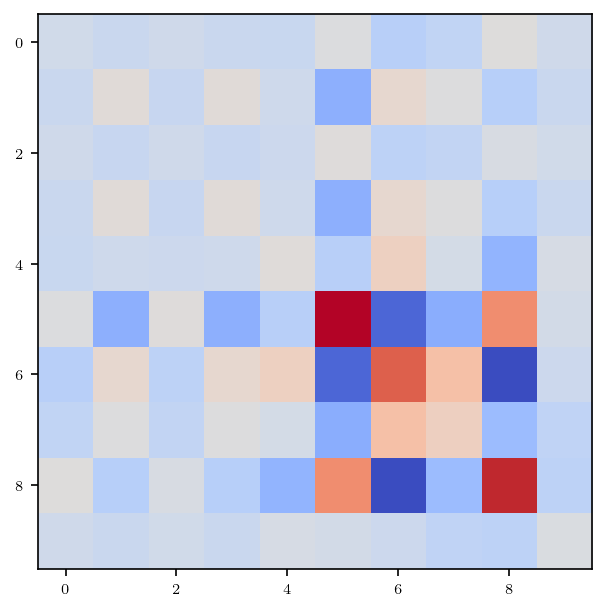

In [66]:
plt.imshow(cov_final, cmap='coolwarm')


In [67]:
from utils import equipotential_standard_normal

S = equipotential_standard_normal(2 * Y_star.shape[0], 20)
L, lower = jax.scipy.linalg.cho_factor(cov_final, lower=True)
Y_star_flat, Y_unflattener = flatten_util.ravel_pytree(Y_star)
samples = np.transpose(np.transpose(np.dot(L, S))+Y_star_flat)

/Users/zabel/projects/tsne/diss/utils.py:83: RuntimeWarning: invalid value encountered in divide
  M = np.dot(mu, np.expand_dims(np.cos(theta), axis=0)) + E * np.sin(theta) / theta


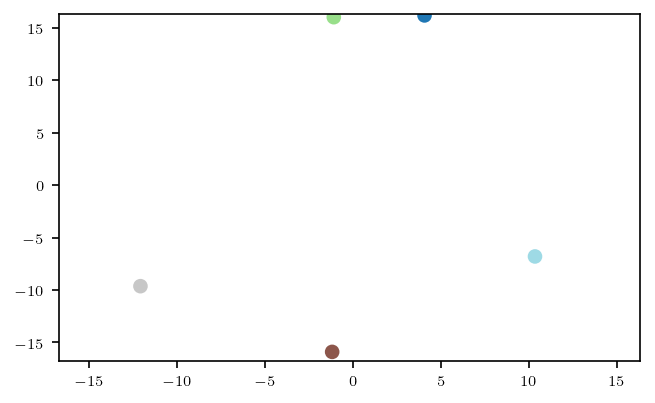

In [68]:
from animate_ifd import *
animate(samples, [i for i in range(Y_star.shape[0])], 'datasets/hypopharynx/animation.gif')

(100, 10)


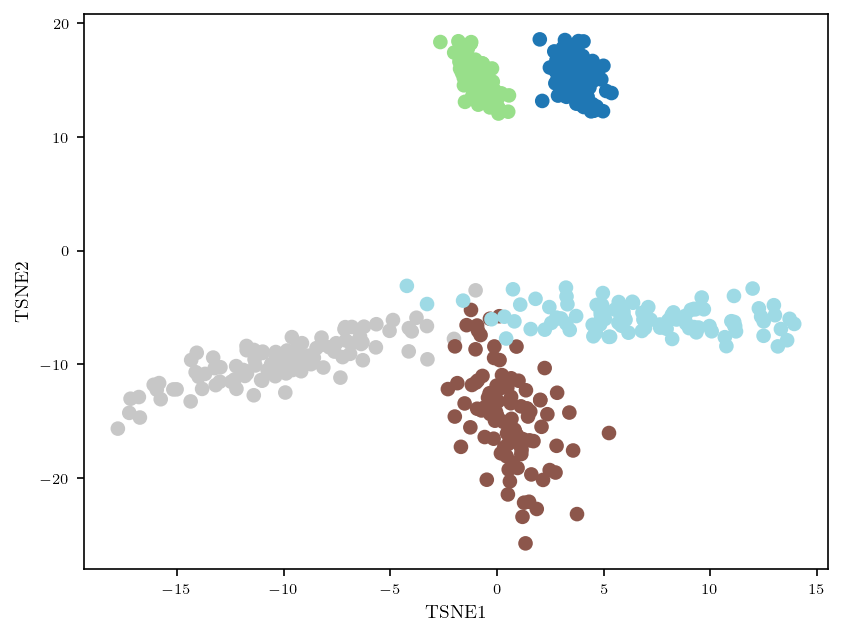

In [69]:
draw_and_plot_samples(Y_flat, Y_unflattener, cov_final, 100, 'tnse_distr.pdf')